# Analysis on Indian Startups from year 1984 to 2020

##### Content The following dataset has data about the Top 300 startups in India. Details about the columns are as follows:

1. Company - Name of the Startup.
2. City - The City in which the startup is started.
3. Starting Year - The Year in which the startup was started.
4. Founders - Name of the founders of the startup.
5. Industries - Industrial domain in which the startup falls.
6. No. of Employees - Number of employees in the startup.
7. Funding Amount in USD - Total funding amount funded to the startup.
8. Funding Rounds - Funding rounds are the number of times a startup goes back to the market to raise more capital. The goal of every round is for founders to trade equity in their business for the capital they can utilize to advance their companies to the next level.
9. No. of Investors - Number of investors in the startup.

### Importing libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Reading and Exploring the dataset

In [6]:
df = pd.read_csv(r"Startups1.csv")

In [7]:
df.shape

(300, 11)

In [8]:
df.head()

,Unnamed: 0,Company,City,Starting Year,Founders,Industries,Description,No. of Employees,Funding Amount in $,Funding Round,No. of Investors
0,0,Urban Company,Gurgaon,2014,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan","Apps, Home Services, Marketplace, Service Indu...",Urban is a marketplace for independent contrac...,1001-5000,445920356,12,16
1,1,Classplus,Noida,2018,"Bhaswat Agarwal, Bikash Dash, Mukul Rustagi, N...","B2B, E-Learning, EdTech, Education, Mobile App...",Classplus is a mobile-first SaaS platform that...,101-250,89506451,10,20
2,2,Paytm,Noida,2010,"Akshay Khanna, Vijay Shekhar Sharma","E-Commerce, Finance, Financial Services, Inter...",Paytm is a payment gateway that allows users a...,501-1000,32448851,4,4
3,3,Apna,Mumbai,2019,Nirmit Parikh,"Employment, Human Resources, Recruiting, Staff...",Apna is a professional networking and job-sear...,101-250,93450000,4,6
4,4,Razorpay,Bengaluru,2014,"Harshil Mathur, Shashank Kumar","Financial Services, FinTech, Payments, Software","Razorpay is a payment acceptance, processing, ...",1001-5000,366600000,7,29


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           300 non-null    int64 
 1   Company              300 non-null    object
 2   City                 300 non-null    object
 3   Starting Year        300 non-null    int64 
 4   Founders             300 non-null    object
 5   Industries           300 non-null    object
 6   Description          300 non-null    object
 7   No. of Employees     300 non-null    object
 8   Funding Amount in $  300 non-null    int64 
 9   Funding Round        300 non-null    int64 
 10  No. of Investors     300 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 25.9+ KB


### Before analyzing the datset let's check Null values in the dataset

In [10]:
df.isnull().sum()

Unnamed: 0             0
Company                0
City                   0
Starting Year          0
Founders               0
Industries             0
Description            0
No. of Employees       0
Funding Amount in $    0
Funding Round          0
No. of Investors       0
dtype: int64

### Check for Duplication

In [11]:
df.nunique()

Unnamed: 0             300
Company                300
City                    24
Starting Year           26
Founders               288
Industries             290
Description            300
No. of Employees        10
Funding Amount in $    293
Funding Round           24
No. of Investors        37
dtype: int64

###### The column No. of Employees is stored as an object type. To understand how the data is represented within this column and determine if it needs to be converted to integers or not.

In [12]:
df['No. of Employees'].unique()

array(['1001-5000', '101-250', '501-1000', '5001-10000', '11-50',
       '251-500', '10001+', '51-100', '1-10', 'Not Available'],
      dtype=object)

##### The two values, "Nov-50" and "01-Oct," seem different in this column, and there is a "Not Available" value too. So, Lets check value counts of these.

In [13]:
df['No. of Employees'].value_counts()

101-250          63
11-50            45
1001-5000        44
251-500          42
51-100           38
501-1000         36
10001+           12
1-10             11
5001-10000        8
Not Available     1
Name: No. of Employees, dtype: int64

#### There is only one record for the Not available category lets check this record further.

In [14]:
df[df['No. of Employees']=="Not Available"]

,Unnamed: 0,Company,City,Starting Year,Founders,Industries,Description,No. of Employees,Funding Amount in $,Funding Round,No. of Investors
285,285,WOW Skin Science India Ltd,Bengaluru,2016,Not Available,"Beauty, Consumer Goods, Cosmetics, Fashion",WOW Skin Science is a line of anti-aging produ...,Not Available,0,0,0


##### Here, In this record Information about founders, employees, Funding amount and No. of investors is not available which is not useful to us. Soo lets drop this record 

In [15]:
df.drop(index=287,axis=0,inplace=True)

In [16]:
df[df['No. of Employees']=="Not Available"]

,Unnamed: 0,Company,City,Starting Year,Founders,Industries,Description,No. of Employees,Funding Amount in $,Funding Round,No. of Investors
285,285,WOW Skin Science India Ltd,Bengaluru,2016,Not Available,"Beauty, Consumer Goods, Cosmetics, Fashion",WOW Skin Science is a line of anti-aging produ...,Not Available,0,0,0


#### Changing the values of 1-Oct and Nov-50 to 1-10 and 11-50 respectively.

In [17]:
df['No. of Employees'].replace(to_replace='01-Oct',value='1-10',inplace=True)
df['No. of Employees'].replace(to_replace='Nov-50',value='11-50',inplace=True)

In [18]:
df['No. of Employees'].unique()

array(['1001-5000', '101-250', '501-1000', '5001-10000', '11-50',
       '251-500', '10001+', '51-100', '1-10', 'Not Available'],
      dtype=object)

## Descriptive Statistics

In [19]:
df.describe()

,Unnamed: 0,Starting Year,Funding Amount in $,Funding Round,No. of Investors
count,299.000000,299.000000,2.990000e+02,299.000000,299.000000
mean,149.040134,2013.401338,3.157480e+08,5.986622,10.558528
std,86.525116,5.146133,1.631461e+09,4.246572,7.541324
min,0.000000,1984.000000,0.000000e+00,0.000000,0.000000
25%,74.500000,2012.000000,1.423445e+07,3.000000,5.000000
50%,149.000000,2015.000000,4.092000e+07,5.000000,9.000000
75%,223.500000,2016.000000,1.322959e+08,7.000000,14.000000
max,299.000000,2020.000000,2.476762e+10,25.000000,45.000000


# Visualization

##### Q1. what is Number of Starups started Yearwise ?

In [20]:
df['Starting Year'].value_counts()

2015    63
2017    29
2016    28
2012    25
2014    21
2019    21
2011    21
2018    18
2013    15
2010    12
2007     8
2008     7
2020     6
2006     5
2009     5
2000     4
2004     2
1990     1
2001     1
1984     1
1996     1
1999     1
1989     1
1995     1
1998     1
1991     1
Name: Starting Year, dtype: int64

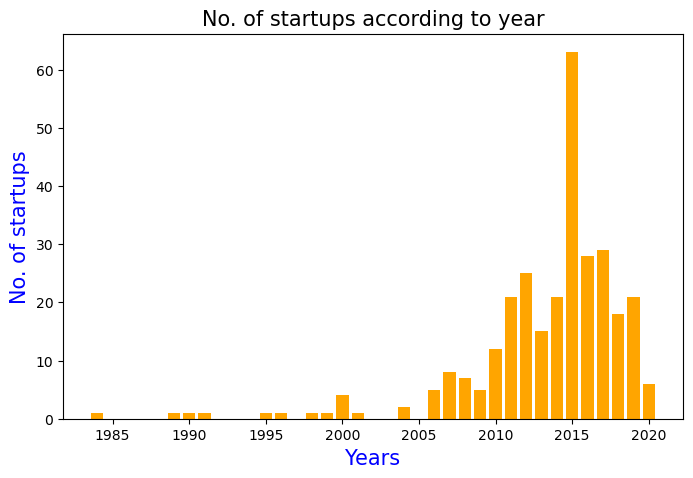

In [21]:
plt.figure(figsize=(8,5))
plt.bar(df['Starting Year'].value_counts().index,df['Starting Year'].value_counts().values,color="orange")
plt.title("No. of startups according to year", fontdict={"fontsize":15})
plt.xlabel("Years",fontdict={"fontsize":15,"color":"b"})
plt.ylabel("No. of startups",fontdict={"fontsize":15,"color":"b"})
plt.show()

##### Insight: Higher numbers of startups were found in the year 2015  which is 63

###### Q2. Which are the cities with highest number of startups?

In [22]:
plot1=df["City"].value_counts().head(10)
plot1
p2=df.loc[[11, 41, 113, 107, 50, 181, 80, 23, 239, 8],'Company']

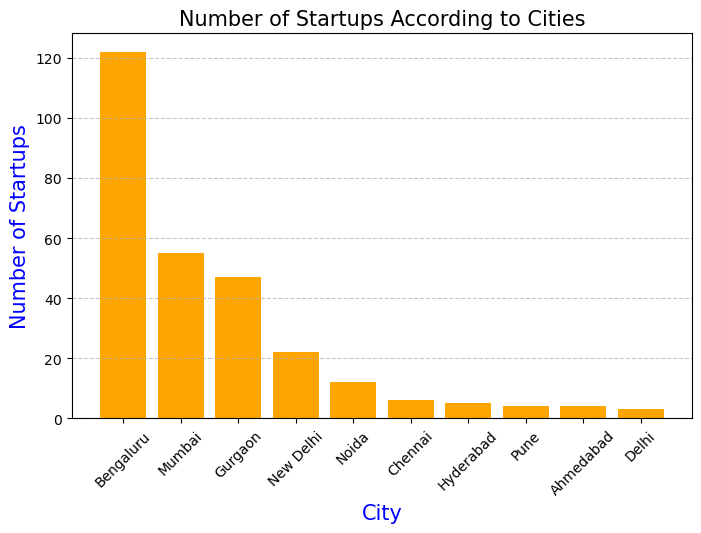

In [23]:
plot1 = df["City"].value_counts().head(10)

# Plotting the bar graph
plt.figure(figsize=(8,5))
plt.bar(plot1.index, plot1, color="orange")
plt.title("Number of Startups According to Cities", fontdict={"fontsize":15})
plt.xlabel("City", fontdict={"fontsize":15, "color":"b"})
plt.ylabel("Number of Startups", fontdict={"fontsize":15, "color":"b"})
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Insight: Bengaluru is the city with most number of startups and follwed by mumbai and gurgaon.

##### Q3. How many Founders are involved in 2 or more startups ?

Not Available             9
Vijay Shekhar Sharma      3
Amit Jain, Anurag Jain    2
Mukesh Ambani             2
Name: Founders, dtype: int64


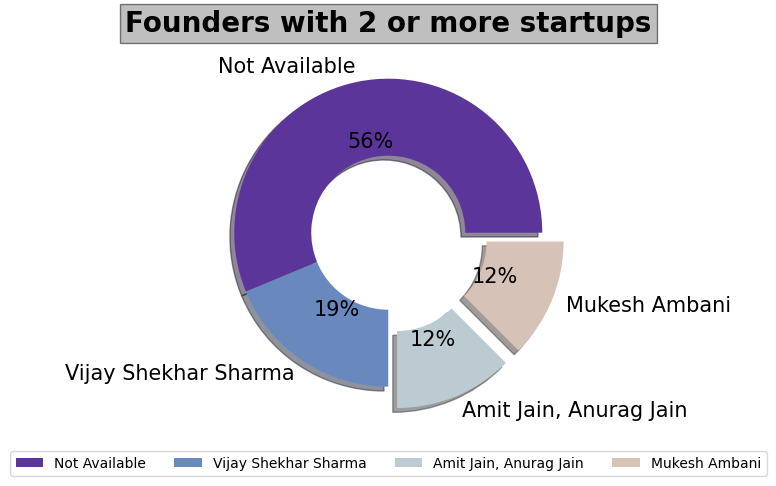

In [24]:
x=df["Founders"].value_counts().sort_values(ascending=False).head(4)
print(x)
color=sns.color_palette("twilight_shifted")
plt.figure(figsize=(5,5))
plt.pie(x,labels=x.index,autopct="%0.0f%%",textprops={"fontsize":15},wedgeprops={"width":0.5},shadow=True,colors=color,explode=[0,0,0.15,0.15])
plt.legend(loc="lower center",bbox_to_anchor=(0.5,-0.15),ncol=4)
plt.title('Founders with 2 or more startups', fontdict={'fontsize': 20, 'color': 'black', 'fontweight': 'bold'}, bbox=dict( facecolor='grey', alpha=0.5,edgecolor='black'));

##### Insight: The Founder with 9 startups name is not available in the data where as vijay shekhar sharma has the highest startups with 3

##### Q4. what were the No of Emplyees in the startups?

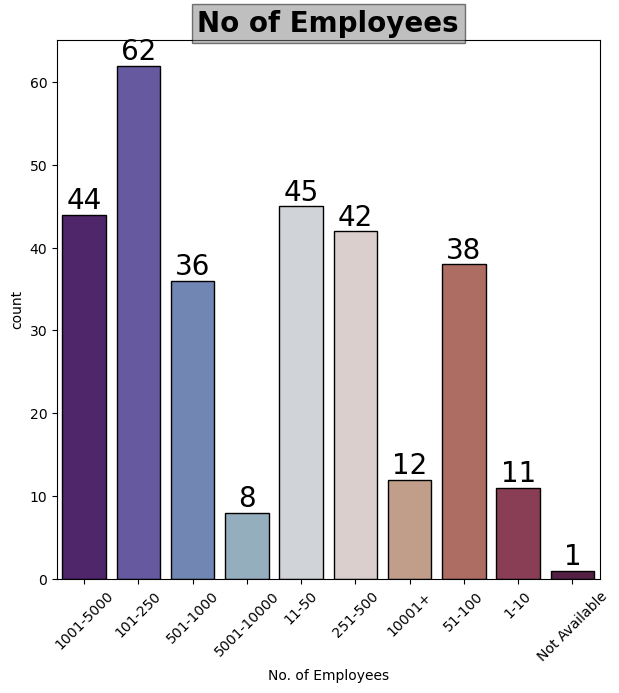

In [25]:
plt.figure(figsize=(7,7))
ax = sns.countplot(x='No. of Employees', data=df, palette='twilight_shifted', edgecolor='black')
plt.xticks(rotation=45)
plt.title('No of Employees', fontdict={'fontsize':20, 'color':'black', 'fontweight':'bold'}, bbox=dict(facecolor='grey', alpha=0.5, edgecolor='black'));

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', fontsize=20,
               xytext=(0,10),
               textcoords='offset points')

##### Insight: Mostly Startups has between 101-250 of employees

##### Q5. Which is the top company who got the maximum Funding Amount in $ ?

In [26]:
df[df["Funding Amount in $"]==df["Funding Amount in $"].max()]

,Unnamed: 0,Company,City,Starting Year,Founders,Industries,Description,No. of Employees,Funding Amount in $,Funding Round,No. of Investors
32,32,Reliance Jio,Mumbai,2010,Mukesh Ambani,"Apps, Information Services, Internet, Telecomm...",Reliance Jio is a telecommunications firm that...,10001+,24767620475,16,35


##### Insight: Reliance jio has got the Maximum Funding

##### Q6. Which are the top 10 companies who got the maximum funding and they were in which City ?

In [27]:
df.groupby(["Starting Year","Company","City"])["Funding Amount in $"].max().sort_values(ascending=False).to_frame().head(10).style.background_gradient(cmap='twilight_shifted')

##### Insight: These are the Top 10 companies who got the maximum funding and Which city they belongs to

##### Q7. Which city startups has got the Highest funding ?

In [28]:
df.groupby("City")["Funding Amount in $"].sum().sort_values(ascending=False).to_frame().style.background_gradient(cmap='twilight_shifted')

,Funding Amount in $
City,
Mumbai,36055016291
Bengaluru,26156212825
Gurgaon,15827429512
Noida,6134005051
Kormangala,3836092733
New Delhi,1888117254
Chennai,849120965
Pune,659265509
Faridabad,638829632


Note: Andheri Comes Under Mumbai
##### Insight: In Mumbai startups has got the highest Funding followed by Bangaluru and Gurgaon.

##### Q8. Which Top 10 companies with highest No. of investors?

In [29]:
a1=df["No. of Investors"].sort_values(ascending=False).head(10)
a1

11    45
23    38
10    36
50    36
32    35
69    33
31    32
88    31
4     29
13    28
Name: No. of Investors, dtype: int64

In [30]:
a2=df.loc[[11, 23, 50, 10, 32, 69, 31, 88, 4, 13],"Company"]
a2

11             Ola
23          BYJU’S
50         ZoomCar
10       Unacademy
32    Reliance Jio
69        cure.fit
31          Rapido
88           Trell
4         Razorpay
13            CRED
Name: Company, dtype: object

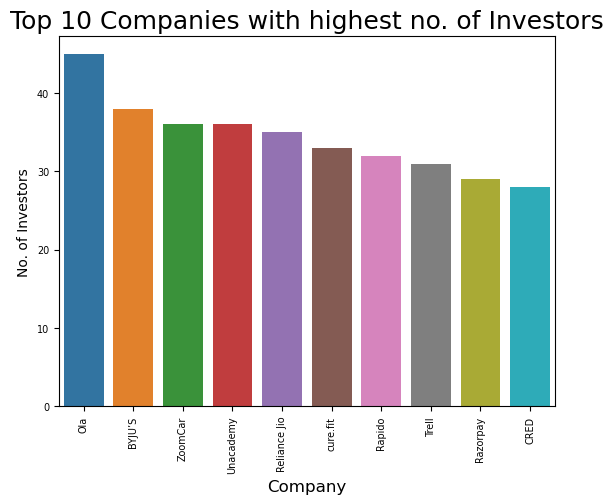

In [31]:
sns.barplot(x=a2,y=a1,data=df)
plt.xticks(rotation='vertical')
plt.title('Top 10 Companies with highest no. of Investors',size=18)
plt.xlabel('Company',size=12)
plt.ylabel('No. of Investors',size=10)
plt.tick_params(labelsize='x-small')

##### Insight: Ola has highest investors which is 45 and followed by Byju's and Zoomcar.

##### Q9. what are the companies with highest funding rounds?

In [32]:
p1=df["Funding Round"].sort_values(ascending=False).head(10)
p1.index

Int64Index([11, 41, 113, 107, 181, 50, 80, 23, 239, 8], dtype='int64')

In [33]:
p2=df.loc[[11, 41, 113, 107, 50, 181, 80, 23, 239, 8],'Company']

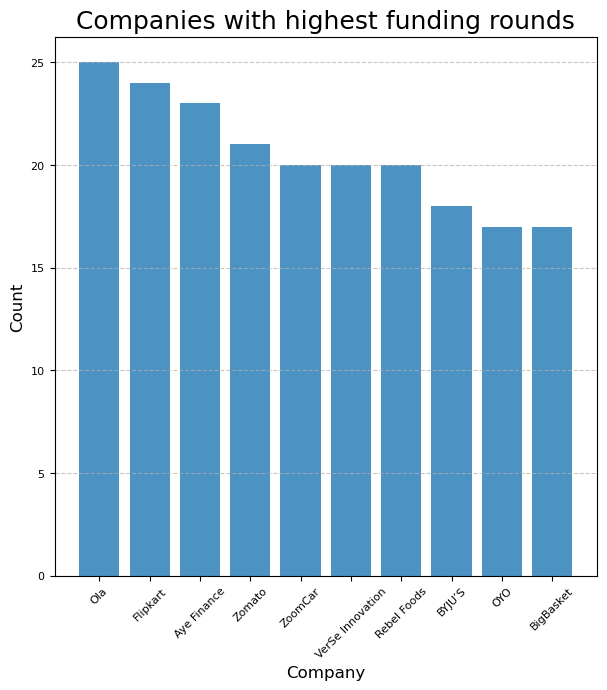

In [34]:
plt.figure(figsize=(7,7))
plt.bar(p2, p1, alpha=0.8)  
plt.title('Companies with highest funding rounds', fontsize=18)   
plt.xlabel('Company', fontsize=12)               
plt.ylabel('Count', fontsize=12)               
plt.tick_params(labelsize=8)
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

##### Insight: Ola has highest funding rounds which is 45 and followed by Flipkart and Aye finance.

##### Q10. what were the No. of Emplyees in the startups ?

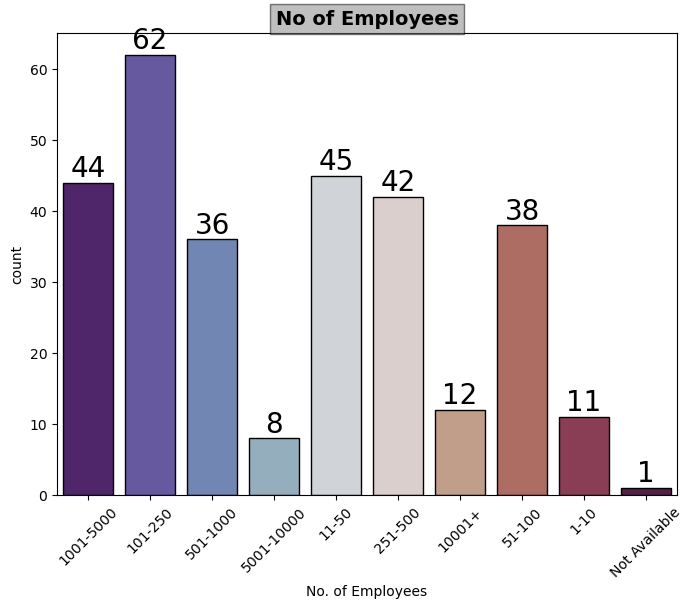

In [35]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x="No. of Employees",data=df,palette='twilight_shifted',edgecolor="black")
plt.xticks(rotation=45)
plt.title('No of Employees', fontdict={'fontsize': 14, 'color': 'black', 'fontweight': 'bold'}, bbox=dict( facecolor='grey', alpha=0.5,edgecolor='black'));

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',fontsize=20,
                xytext = (0, 10),
                textcoords = 'offset points')

##### Insight: Most of the startup companies have 101-250 employees working in their company.

### Insights found in Analysis are:
    1. Higher numbers of startups were found in the year 2015 which is 63
    2. Bengaluru is the city with most number of startups and follwed by mumbai and gurgaon.
    3. The Founder with 9 startups name is not available in the data where as vijay shekhar sharma has the highest startups with 
    4. Mostly Startups has between 101-250 of employees
    5. Reliance jio has got the Maximum Funding
    6. Ola has highest investors which is 45 and followed by Byju's and Zoomcar.
    7. In Mumbai startups has got the highest Funding followed by Bangaluru and Gurgaon.
    8. Ola has highest funding rounds which is 45 and followed by Flipkart and Aye finance.
    9. Most of the startup companies have 101-250 employees working in their company.
    
    
    
The analysis finds that startup trends vary, especially in cities like Bengaluru, Mumbai, and Gurgaon, where many startups are located. Notably, the highest number of startups was found in 2015. Some startups receive a lot of funding, indicating investor confidence. Most startups employ between 101 to 250 people, suggesting they are in a growth phase.Understanding these findings is crucial for supporting startups in their growth and innovation efforts.